In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [16]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

In [17]:
(df[df.group=='treatment']['landing_page']=='old_page').sum()+(df[df.group=='control']['landing_page']=='new_page').sum()

3893

In [18]:
df_error = df.query("group == 'treatment' and landing_page =='old_page'")
df_error2 =df.query("group == 'control' and landing_page =='new_page'")
df2=df.drop(df_error.index)
df2=df2.drop(df_error2.index)
#df_error=df_error.append(df.query("group == 'treatment' and landing_page =='old_page'"))
#df2=df.drop(df_error.index)

In [19]:
d_counter = df2.user_id.value_counts()
d_counter[d_counter>1]

773192    2
Name: user_id, dtype: int64

In [20]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [21]:
df2=df2.drop(index=1899)

In [22]:
df2.drop_duplicates('user_id',inplace=True)

In [23]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [24]:
df_treatment=df2[df2.group=='treatment']
df_control=df2[df2.group=='control']
average_conversion_treatment=df_treatment.converted.mean()
average_conversion_control=df_control.converted.mean()
obs_diff=average_conversion_treatment-average_conversion_control
obs_diff

-0.0015782389853555567

(array([1.000e+00, 8.000e+00, 1.430e+02, 8.260e+02, 2.456e+03, 3.452e+03,
        2.252e+03, 7.550e+02, 1.020e+02, 5.000e+00]),
 array([-0.10047962, -0.08232433, -0.06416903, -0.04601374, -0.02785845,
        -0.00970316,  0.00845213,  0.02660742,  0.04476271,  0.06291801,
         0.0810733 ]),
 <a list of 10 Patch objects>)

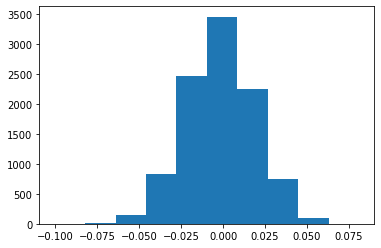

In [25]:
diff=[]
for _ in range(10000):
    sample = df2.sample(1000,replace=True)
    #average_conversion_treatment_sample=sample[sample.group=='trdeatment'].converted.mean()
    #average_conversion_control_sample=sample[sample.group=='control'].converted.mean()
    diff.append(sample[sample.group=='treatment'].converted.mean() - sample[sample.group=='control'].converted.mean())   
plt.hist(diff)

(array([1.000e+00, 8.000e+00, 1.430e+02, 8.260e+02, 2.456e+03, 3.452e+03,
        2.252e+03, 7.550e+02, 1.020e+02, 5.000e+00]),
 array([-0.10047962, -0.08232433, -0.06416903, -0.04601374, -0.02785845,
        -0.00970316,  0.00845213,  0.02660742,  0.04476271,  0.06291801,
         0.0810733 ]),
 <a list of 10 Patch objects>)

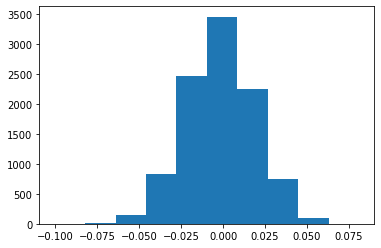

In [26]:
diff = np.array(diff)
null=np.random.normal(0,diff.std(),diff.size)
plt.hist(diff)

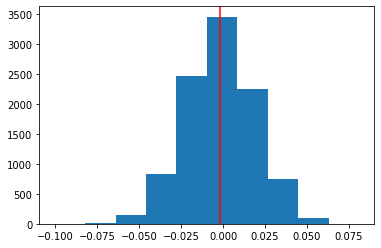

In [27]:
plt.hist(diff)
plt.axvline(obs_diff,c='red')

In [28]:
(null>obs_diff).mean()

0.5363